# Leding Club Case Study

Business Objective:

Identify the risks of a loan application based on driving factors which are strong indicators of the loan default. The out of the study should recommned or guide credit approver to accept a loan application or reject it.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

# Import graph libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#warnings
import warnings 
warnings.filterwarnings("ignore")

import datetime

In [2]:
#import dataframe and checking first few records

lc_0 = pd.read_csv('loan.csv', dtype=object ) #  dtype = {'last_pymnt_amnt': float})

lc_0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [3]:
#checking the dataframe shape

lc_0.shape

# Check the info
#print(lc_0.dtypes)

# check data info
print(lc_0.describe())

            id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
count    39717     39717     39717       39717           39717       39717   
unique   39717     39717       885        1041            8205           2   
top     614599    645950     10000       10000            5000   36 months   
freq         1         1      2833        2741            1309       29096   

       int_rate installment  grade sub_grade  ... num_tl_90g_dpd_24m  \
count     39717       39717  39717     39717  ...                  0   
unique      371       15383      7        35  ...                  0   
top      10.99%      311.11      B        B3  ...                NaN   
freq        956          68  12020      2917  ...                NaN   

       num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75  \
count                   0              0                0   
unique                  0              0                0   
top                   NaN            NaN              NaN   
freq

# Data Handling and Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. 


    1. Dropping the rows and columns containing the missing values
    2. Impute missing values, if needed
    3. Keep the missing values if they don't affect the analysis

Incorrect Data Types:
    1. Clean certain values
    2. Clean and convert an entire column

In [4]:
#idnetifying missing values.

lc_0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Determine percentage of missing values in all columns, and round it off to 2 decimal places
all_cols=lc_0.columns

pers=[]
#print(col_df)

pers= list((lc_0.isnull().sum() / len(lc_0) * 100).round(2) )

col_df= pd.DataFrame({'cols':all_cols, 'pers': pers })
print(col_df)

# column with 100% nulls

print("Number of columns with 100% null are ", col_df[col_df.pers==100].cols.count())




                           cols   pers
0                            id    0.0
1                     member_id    0.0
2                     loan_amnt    0.0
3                   funded_amnt    0.0
4               funded_amnt_inv    0.0
..                          ...    ...
106                   tax_liens    0.1
107             tot_hi_cred_lim  100.0
108           total_bal_ex_mort  100.0
109              total_bc_limit  100.0
110  total_il_high_credit_limit  100.0

[111 rows x 2 columns]
Number of columns with 100% null are  54


In [6]:
# Dropping 100% missing value columns, this is another easy function to delete nulls
lc_1 = lc_0.dropna(axis=1, how='all')
lc_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [7]:
# Check column count after drop
lc_1.shape

(39717, 57)

In [8]:
# Delete colums having more than 30% missing data, i.e it has only less than 30% of values.
# With such less number of data within a column would not provide good analysis

print("Number of columns with more than 30% null are ", col_df[(col_df.pers>=30 )&(col_df.pers<100) ].cols.count())
print(col_df[(col_df.pers>=30 )&(col_df.pers<100) ].cols)

print("Deleting these 4 column!")
lc_2 = lc_1.drop(columns=col_df[(col_df.pers>=30 )&(col_df.pers<100) ].cols)
# desc column could be a interesting one to analyse but as we have not gone through NLP dropping it for now!

# remove the deleted colums from colums list of col_df
col_df=col_df[~(col_df.pers>=30 )]

Number of columns with more than 30% null are  4
19                      desc
28    mths_since_last_delinq
29    mths_since_last_record
47              next_pymnt_d
Name: cols, dtype: object
Deleting these 4 column!


In [9]:
print(col_df.shape)
lc_2.shape
lc_2.head()

(53, 2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [10]:
#we shall find the column that has same value throughout the dataset or having all unique values
# checking the info about remaining columns
lc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          39717 non-null  object
 1   member_id                   39717 non-null  object
 2   loan_amnt                   39717 non-null  object
 3   funded_amnt                 39717 non-null  object
 4   funded_amnt_inv             39717 non-null  object
 5   term                        39717 non-null  object
 6   int_rate                    39717 non-null  object
 7   installment                 39717 non-null  object
 8   grade                       39717 non-null  object
 9   sub_grade                   39717 non-null  object
 10  emp_title                   37258 non-null  object
 11  emp_length                  38642 non-null  object
 12  home_ownership              39717 non-null  object
 13  annual_inc                  39717 non-null  ob

In [11]:
# Looking for colums having same value for all rows.
# we shall count unique value count for all colums and store it to col_df 

lc_2.apply(lambda x: len(x.unique()) )

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [12]:
# We see the columns 'id','member_id','url' has all unique values throughout
# We also see columns 'delinq_amnt','acc_now_delinq','application_type',
# 'policy_code','initial_list_status','pymnt_plan', has same value throughout the dataset.
# These values would not contribute the our analysis so droping them
unic_val=['id','member_id','url','delinq_amnt','acc_now_delinq','application_type','policy_code','initial_list_status','pymnt_plan']

lc_2=lc_2.drop(unic_val, axis=1)


In [13]:
lc_2.shape

(39717, 44)

In [14]:
#col2_df=lc_2.apply(lambda x: len(x.unique()) )
lc_2.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
# From data distionary these columns are all current customer behaviour for ongoing loan payment. 
# This will not be available at the time of loan application, so they can not be used in analysis / prediction for loan approval
#       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 
#       'revol_util', 'total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
#        'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries',
#       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d'
#   
cust_behav_val=['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 
                'revol_util', 'total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries',
                'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d']
lc_2=lc_2.drop(cust_behav_val, axis=1)

In [16]:
lc_2['emp_length'].unique()
lc_2.shape

(39717, 24)

In [17]:
lc_2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [18]:
lc_2.apply(lambda x: len(x.unique()) )

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
collections_12_mths_ex_med        2
chargeoff_within_12_mths          2
pub_rec_bankruptcies              4
tax_liens                         2
dtype: int64

In [19]:
# Checking some of the unique values of comumns
print("loan_status " , lc_2.loan_status.unique())
print("home_ownership ", lc_2.home_ownership.unique())
print("tax_liens ",lc_2.tax_liens.unique())
print("purpose ", lc_2.purpose.unique())

loan_status  ['Fully Paid' 'Charged Off' 'Current']
home_ownership  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
tax_liens  ['0' nan]
purpose  ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [20]:
# the column tax_liens has only 0 or nan in it so can be deleted 
lc_2=lc_2.drop('tax_liens', axis=1)
print(lc_2.shape)

(39717, 23)


In [21]:
# The 
print("collections_12_mths_ex_med ",lc_2.collections_12_mths_ex_med.unique())
print("chargeoff_within_12_mths ", lc_2.chargeoff_within_12_mths.unique())
print("pub_rec_bankruptcies ", lc_2.pub_rec_bankruptcies.unique())

collections_12_mths_ex_med  ['0' nan]
chargeoff_within_12_mths  ['0' nan]
pub_rec_bankruptcies  ['0' '1' '2' nan]


In [22]:
# 'collections_12_mths_ex_med','chargeoff_within_12_mths' also values to either 0 or nan
# so they can also be deleted
lc_2=lc_2.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths'], axis=1)
print(lc_2.shape)

(39717, 21)


In [23]:
lc_2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
# 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'


In [25]:
lc_2.groupby('loan_status').count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5143,5399,5627,5627,5627,5627,5627,5625,5627,5627,5627,5509
Current,1140,1140,1140,1140,1140,1140,1140,1140,1067,1098,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,31048,32145,32950,32950,32950,32950,32950,32941,32950,32950,32950,32371


In [26]:
lc_2[(lc_2.loan_amnt > lc_2.funded_amnt_inv)].groupby('loan_status').count()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
loan_status,,,,,,,,,,,,,,,,,,,,
Charged Off,2473,2473,2473,2473,2473,2473,2473,2473,2278,2412,2473,2473,2473,2473,2473,2473,2473,2473,2473,2430
Current,626,626,626,626,626,626,626,626,596,611,626,626,626,626,626,626,626,626,626,626
Fully Paid,14210,14210,14210,14210,14210,14210,14210,14210,13469,13965,14210,14210,14210,14210,14210,14205,14210,14210,14210,13904


In [27]:
lc_2[(lc_2.loan_amnt > lc_2.funded_amnt_inv)& (lc_2.loan_status=='Charged Off')]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
9,5375,5375,5350,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,15000,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0
55,21000,21000,20975,60 months,19.91%,555.33,E,E4,Costco,7 years,...,50000,Verified,Dec-11,Charged Off,debt_consolidation,Bill pay of,980xx,WA,21.58,0
105,18825,18825,18800,60 months,16.77%,465.53,D,D2,Texas Health & Human Services Commission,10+ years,...,38000,Verified,Dec-11,Charged Off,debt_consolidation,Coledon's Club Loan,787xx,TX,23.18,0
120,25000,25000,23088.16106,60 months,13.49%,575.12,C,C1,Midnight,10+ years,...,67000,Verified,Dec-11,Charged Off,credit_card,"Pay off credit card, refinance house",996xx,AK,14.15,0
121,19750,19750,19725,36 months,10.65%,643.33,B,B2,"PACIFIC WOOD LAMINATES, INC.",4 years,...,45000,Verified,Dec-11,Charged Off,debt_consolidation,CONSOLIDATION,974xx,OR,22.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39623,9000,9000,700,36 months,12.49%,301.04,D,D3,Maximus,8 years,...,39000,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,207xx,MD,5.08,1
39626,7725,7725,1025,36 months,13.75%,263.09,E,E2,Paul Scherer & Company LLP,< 1 year,...,62200,Not Verified,Oct-07,Charged Off,debt_consolidation,Debt Consolidation,100xx,NY,9.8,NaN
39638,8000,8000,150,36 months,12.17%,266.37,D,D2,Equality Florida,9 years,...,70000,Not Verified,Sep-07,Charged Off,credit_card,Interest Rate,337xx,FL,10.2,NaN
39652,3175,3175,1425,36 months,11.54%,104.76,C,C5,Tripolitan Films,< 1 year,...,15000,Not Verified,Aug-07,Charged Off,small_business,Young Entrepreneur Needs Computer,015xx,MA,12.24,NaN


In [28]:
lc_2[(lc_2.loan_amnt > lc_2.funded_amnt_inv)& (lc_2.loan_status=='Charged Off')]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
9,5375,5375,5350,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,15000,Verified,Dec-11,Charged Off,other,Building my credit history.,774xx,TX,18.08,0
55,21000,21000,20975,60 months,19.91%,555.33,E,E4,Costco,7 years,...,50000,Verified,Dec-11,Charged Off,debt_consolidation,Bill pay of,980xx,WA,21.58,0
105,18825,18825,18800,60 months,16.77%,465.53,D,D2,Texas Health & Human Services Commission,10+ years,...,38000,Verified,Dec-11,Charged Off,debt_consolidation,Coledon's Club Loan,787xx,TX,23.18,0
120,25000,25000,23088.16106,60 months,13.49%,575.12,C,C1,Midnight,10+ years,...,67000,Verified,Dec-11,Charged Off,credit_card,"Pay off credit card, refinance house",996xx,AK,14.15,0
121,19750,19750,19725,36 months,10.65%,643.33,B,B2,"PACIFIC WOOD LAMINATES, INC.",4 years,...,45000,Verified,Dec-11,Charged Off,debt_consolidation,CONSOLIDATION,974xx,OR,22.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39623,9000,9000,700,36 months,12.49%,301.04,D,D3,Maximus,8 years,...,39000,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,207xx,MD,5.08,1
39626,7725,7725,1025,36 months,13.75%,263.09,E,E2,Paul Scherer & Company LLP,< 1 year,...,62200,Not Verified,Oct-07,Charged Off,debt_consolidation,Debt Consolidation,100xx,NY,9.8,NaN
39638,8000,8000,150,36 months,12.17%,266.37,D,D2,Equality Florida,9 years,...,70000,Not Verified,Sep-07,Charged Off,credit_card,Interest Rate,337xx,FL,10.2,NaN
39652,3175,3175,1425,36 months,11.54%,104.76,C,C5,Tripolitan Films,< 1 year,...,15000,Not Verified,Aug-07,Charged Off,small_business,Young Entrepreneur Needs Computer,015xx,MA,12.24,NaN


In [29]:
lc_2.groupby(['loan_status','pub_rec_bankruptcies']).count()

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_status pub_rec_bankruptcies                                            
Charged Off 0                          5141         5141             5141   
            1                           366          366              366   
            2                             2            2                2   
Current     0                          1101         1101             1101   
            1                            37           37               37   
            2                             2            2                2   
Fully Paid  0                         31097        31097            31097   
            1                          1271         1271             1271   
            2                             3            3                3   

                                   term  int_rate  installment  grade  \
loan_status pub_rec_bankruptcies                                        
Charged Off 0                      5141      5141         5141   5141   
            1                       366       366          366    366   
            2                         2         2            2      2   
Current     0                      1101      1101         1101   1101   
            1                        37        37           37     37   
            2                         2         2            2      2   
Fully Paid  0                     31097     31097        31097  31097   
            1                      1271      1271         1271   1271   
            2                         3         3            3      3   

                                  sub_grade  emp_title  emp_length  \
loan_status pub_rec_bankruptcies                                     
Charged Off 0                          5141       4709        4944   
            1                           366        320         335   
            2                             2          2           2   
Current     0                          1101       1034        1063   
            1                            37         31          33   
            2                             2          2           2   
Fully Paid  0                         31097      29347       30368   
            1                          1271       1156        1195   
            2                             3          3           3   

                                  home_ownership  annual_inc  \
loan_status pub_rec_bankruptcies                               
Charged Off 0                               5141        5141   
            1                                366         366   
            2                                  2           2   
Current     0                               1101        1101   
            1                                 37          37   
            2                                  2           2   
Fully Paid  0                              31097       31097   
            1                               1271        1271   
            2                                  3           3   

                                  verification_status  issue_d  purpose  \
loan_status pub_rec_bankruptcies                                          
Charged Off 0                                    5141     5141     5141   
            1                                     366      366      366   
            2                                       2        2        2   
Current     0                                    1101     1101     1101   
            1                                      37       37       37   
            2                                       2        2        2   
Fully Paid  0                                   31097    31097    31097   
            1                                    1271     1271     1271   
            2                                       3        3        3   

                                  title  zip_code  addr_state    dti  
loan_stat

In [30]:
lc_2.dtypes

loan_amnt               object
funded_amnt             object
funded_amnt_inv         object
term                    object
int_rate                object
installment             object
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc              object
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                     object
pub_rec_bankruptcies    object
dtype: object

In [31]:
lc_2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
count,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,...,39717,39717,39717,39717,39717,39706,39717,39717,39717,39020
unique,885,1041,8205,2,371,15383,7,35,28820,11,...,5318,3,55,3,14,19615,823,50,2868,3
top,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,...,60000,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,0,0
freq,2833,2741,1309,29096,956,68,12020,2917,134,8879,...,1505,16921,2260,32950,18641,2184,597,7099,183,37339


In [32]:
lc_2.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.01%      1
17.34%      1
16.71%      1
17.54%      1
24.59%      1
Name: int_rate, Length: 371, dtype: int64

In [33]:
lc_2.dtypes

loan_amnt               object
funded_amnt             object
funded_amnt_inv         object
term                    object
int_rate                object
installment             object
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc              object
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                     object
pub_rec_bankruptcies    object
dtype: object

In [34]:
# We shall drop 'funded_amnt','funded_amnt_inv' as it is almost same as 'loan_amnt'
lc_3=lc_2.drop(['funded_amnt','funded_amnt_inv'], axis=1)

In [35]:
lc_3.shape

(39717, 19)

In [36]:
## Now change the datatypes of the needed columns
# set loan_amnt, annual_inc , dti, installment as float
lc_3['loan_amnt'] = lc_3['loan_amnt'].astype(float)
lc_3['annual_inc'] = lc_3['annual_inc'].astype(float)
lc_3['dti'] = lc_3['dti'].astype(float)
lc_3['installment'] = lc_3['installment'].astype(float)

In [37]:
lc_3.info()
#lc_3.dti.head()
#lc_3.dti.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  float64
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  title                 39706 non-null  object 
 15  zip_code           

In [38]:
# int_rate is given as % we will have to change it to float for our calculations 
lc_3.int_rate = lc_3.int_rate.apply(lambda x: float(str(x).strip('%')))

In [39]:
#Correct int_rate (rate of interest) and Term in order to slice the column values

lc_3.term = lc_3.term.apply(lambda x: int(x[1:3]))


In [40]:
lc_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  float64
 1   term                  39717 non-null  int64  
 2   int_rate              39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  title                 39706 non-null  object 
 15  zip_code           

In [41]:
# loans with loan_status 'Current' 
# These are loans that are still running, repayment is going on, the loans can end as Fully paid or charges off
# So this population would not be helpful in our analysis, so removing these 1140 rows and creating a new dataframe

lc_4= lc_3[~(lc_3.loan_status=='Current') ]
print(lc_4.shape)

(38577, 19)


In [42]:
# Looking for null values for treatment
lc_4.isnull().sum()
#(lc_4.isnull().sum()/len(lc_4) *100).round(2)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [43]:
#looking at the litthe missed colums of pub_rec_bankruptcies 

print(lc_4.pub_rec_bankruptcies.unique() )
lc_4.pub_rec_bankruptcies.value_counts()

['0' '1' '2' nan]


0    36238
1     1637
2        5
Name: pub_rec_bankruptcies, dtype: int64

In [44]:
# We shall impute the column with its median as they are numbers, but as we have few nan it cant be converted to int.
# so we shall set it with mode, as they are still treated as object/str now
lc_4.pub_rec_bankruptcies.mode()[0]

lc_4.pub_rec_bankruptcies=lc_4.pub_rec_bankruptcies.fillna(lc_4.pub_rec_bankruptcies.mode()[0])

In [45]:
#checking the value_counts() to see count for 0 is increased
lc_4.pub_rec_bankruptcies.value_counts()

lc_4.pub_rec_bankruptcies = lc_4.pub_rec_bankruptcies.astype(int)

In [46]:
lc_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   term                  38577 non-null  int64  
 2   int_rate              38577 non-null  float64
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  title                 38566 non-null  object 
 15  zip_code           

In [47]:
#treating title column
lc_4.title.head()

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
5    My wedding loan I promise to pay back
Name: title, dtype: object

In [48]:
lc_4.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [49]:
# the value within title means almost same as that of purpose of loan. so droping this column
lc_4=lc_4.drop('title', axis=1)
lc_4.shape


(38577, 18)

In [50]:
lc_4.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies       0
dtype: int64

In [51]:
# treating employment length column
lc_4.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [52]:
# We shall drop nan value from emp_length as this null value is quite small percentage of date

lc_4=lc_4[~lc_4.emp_length.isnull()]




In [53]:

lc_4.emp_title.describe()

count       36136
unique      27982
top       US Army
freq          131
Name: emp_title, dtype: object

In [54]:
# check remaining missing columns
lc_4.isnull().sum()/len(lc_4)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.037503
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

In [55]:
# emp_title also miss a mere 0.037 % data, so we impute it with NA not available or something like that or drop
# for the assignment purpose we are going with imputation with 'NA'
lc_4.emp_title=lc_4.emp_title.fillna('NA')

In [56]:
#Now we have completed treating the missing data
lc_4.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [57]:
lc_4.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies      int32
dtype: object

In [58]:
lc_4.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [59]:
#Change issue_d to datetime
lc_4.issue_d =pd.to_datetime(lc_4.issue_d, format="%b-%y")
# it will be useful to have month and year seporate columns for analysis
lc_4['issue_month']=lc_4.issue_d.dt.month
lc_4['issue_year']=lc_4.issue_d.dt.year
lc_4.shape

(37544, 20)

In [60]:
lc_4.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,5000.0,36,10.65,162.87,B,B2,NA,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,12,2011
1,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,12,2011
2,2400.0,36,15.96,84.33,C,C5,NA,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,12,2011
3,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,12,2011
5,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,12,2011


## Analysis

Univariate Analysis
1. First let us see the data of loan_status ie fully paid vs charged off 

<AxesSubplot:>

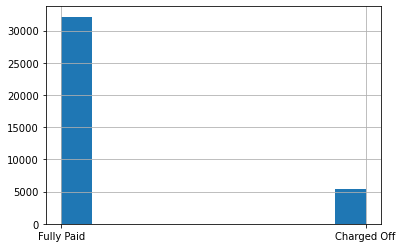

In [61]:
lc_4.loan_status.hist()


In [62]:
(lc_4.groupby(lc_4.loan_status).loan_status.count()/len(lc_4)*100).round(2)

loan_status
Charged Off    14.38
Fully Paid     85.62
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

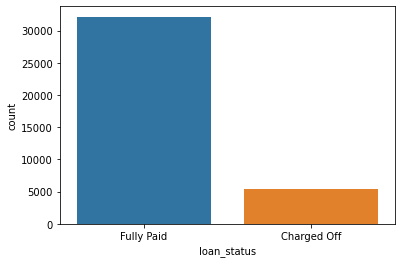

In [63]:
# We see 85.62% of the loans are Fully paid wile a few of 14.38% are Charged off
# With stylish seaborn countmap it is as shownbelow
sns.countplot(lc_4.loan_status)

<AxesSubplot:>

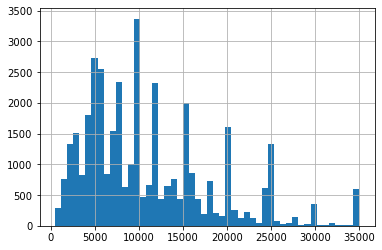

In [64]:
#Let us analyse loan_amnt, how is it distributed.
lc_4.loan_amnt.hist(bins=50)

<b> Loan amount seems to be spiking at round figures around each $5000.
Greater number of loans are taken for amount in between $5000 and $15000
</b>


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

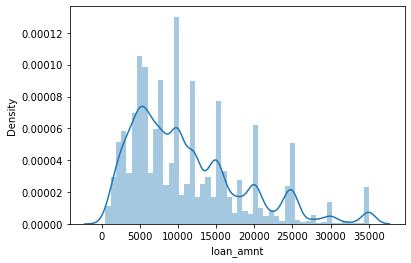

In [65]:
#
sns.distplot(lc_4.loan_amnt)

In [66]:
lc_4.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [67]:
lc_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37544 non-null  float64       
 1   term                  37544 non-null  int64         
 2   int_rate              37544 non-null  float64       
 3   installment           37544 non-null  float64       
 4   grade                 37544 non-null  object        
 5   sub_grade             37544 non-null  object        
 6   emp_title             37544 non-null  object        
 7   emp_length            37544 non-null  object        
 8   home_ownership        37544 non-null  object        
 9   annual_inc            37544 non-null  float64       
 10  verification_status   37544 non-null  object        
 11  issue_d               37544 non-null  datetime64[ns]
 12  loan_status           37544 non-null  object        
 13  purpose         

<AxesSubplot:xlabel='int_rate'>

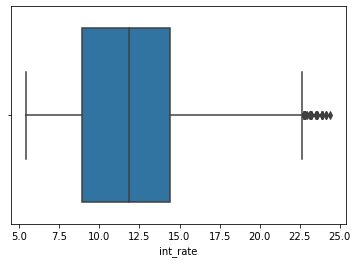

In [68]:
sns.boxplot(lc_4.int_rate)

In [69]:
lc_4.int_rate.quantile(.98)

20.03

In [70]:
#lc_4[lc_4.int_rate  20.03].count()
lc_5=lc_4[(lc_4.int_rate < 20.03)]

<AxesSubplot:xlabel='int_rate'>

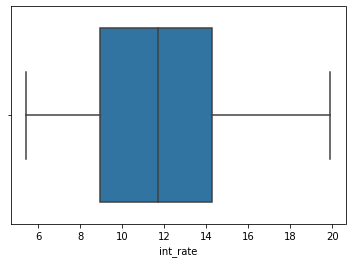

In [71]:
sns.boxplot(lc_5.int_rate)

In [72]:
lc_5.int_rate.describe()

count    36784.000000
mean        11.772924
std          3.469399
min          5.420000
25%          8.940000
50%         11.710000
75%         14.260000
max         19.910000
Name: int_rate, dtype: float64

In [73]:
lc_4.int_rate.describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [74]:

lc_4.groupby('loan_status').loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5399.0,12244.077607,8086.515636,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,32145.0,10930.419972,7206.743260,500.0,5400.0,9600.0,15000.0,35000.0


<AxesSubplot:xlabel='purpose', ylabel='Count'>

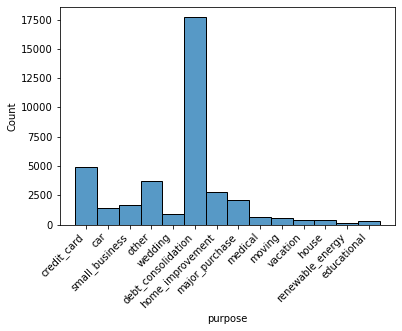

In [75]:
#purpose of loan distribution
lc_4.purpose.unique()
#plt.margins(.02, .02)
#print(lc_4.groupby('purpose').loan_amnt.describe())

plt.xticks(rotation=45, horizontalalignment='right',
    fontweight='light' )
sns.histplot(lc_4.purpose)

#### We see majority of loans were taken for debt_consolidation followed by credit card. 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

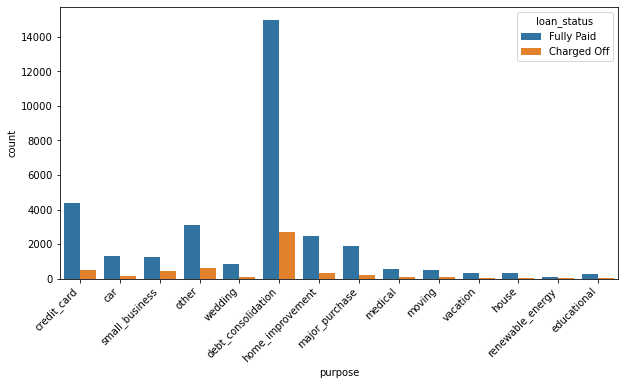

In [340]:
lc_4.groupby('purpose').loan_amnt.count()
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', data=lc_4, hue='loan_status' )
plt.xticks( rotation=45, horizontalalignment='right')


['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
purpose
car                    1448
credit_card            4899
debt_consolidation    17675
educational             317
home_improvement       2785
house                   354
major_purchase         2080
medical                 656
moving                  552
other                  3713
renewable_energy         94
small_business         1710
vacation                348
wedding                 913
Name: loan_status, dtype: int64
purpose
car                    155
credit_card            510
debt_consolidation    2679
educational             52
home_improvement       330
house                   59
major_purchase         211
medical                101
moving                  84
other                  596
renewable_energy        18
small_business         462
vacation                50
wedding               

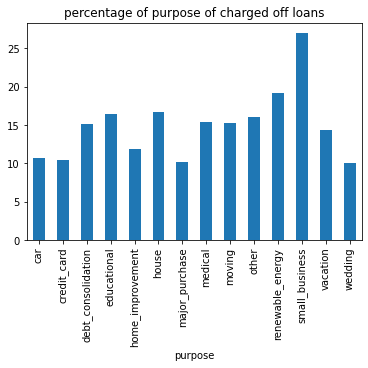

In [352]:
# We shall analyse the percentage of purpose of charged off loan with that of all loans
nm=lc_4.purpose.unique()
print(nm)
v1=lc_4.groupby('purpose').loan_status.count()
v1.shape
print(v1)
v2=lc_4[lc_4.loan_status=='Charged Off'].groupby('purpose').loan_status.count()
print(v2)
ax=(v2*100/v1).plot.bar()
ax.set_title("percentage of purpose of charged off loans")
print(v2*100/v1)

<b>
We see majority of loans were taken for debt_consolidation followed by credit card. But they were mostly fully paid. Therefore, indicating a profitable deal for Lending Club. 
<br>
Small business is the category which shows the highest percentage of charged off loans. We recommend  Loan Club to carefully analyze and  reduce small business loans.
<br>
We suggest to give a greater number of Loan for wedding, major purchase, car and credit card as they are most likely to be fully paid.
</b>

In [76]:
# loans distributed over months
(lc_4.groupby('issue_month').loan_amnt.describe()/len(lc_4)*100).round(2)

,count,mean,std,min,25%,50%,75%,max
issue_month,,,,,,,,
1,6.21,28.59,16.72,1.33,15.98,26.64,39.95,66.59
2,6.07,28.83,17.66,2.00,15.98,26.64,39.69,93.22
3,7.01,29.26,19.08,1.33,15.32,26.57,39.95,93.22
4,7.34,28.82,19.60,2.66,13.32,24.24,39.95,93.22
5,7.56,28.85,19.40,2.66,13.32,23.97,39.95,93.22
6,8.24,28.12,20.00,2.66,13.32,22.37,38.35,93.22
7,8.66,27.76,19.02,2.66,13.32,22.37,38.35,93.22
8,8.85,29.13,19.98,2.66,13.32,23.97,39.95,93.22
9,9.04,30.10,20.43,2.66,13.40,26.10,39.95,93.22


<AxesSubplot:xlabel='issue_month', ylabel='count'>

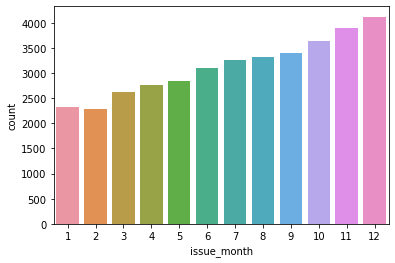

In [77]:
sns.countplot(lc_4.issue_month)

#### An observation, most of the loans were taken in year end around the month of December and November.

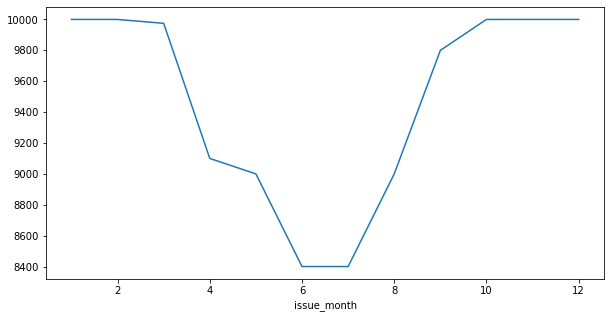

In [78]:
plt.figure(figsize=[10,5])
lc_4.groupby('issue_month').loan_amnt.median().plot()
plt.show()

<AxesSubplot:xlabel='issue_year', ylabel='count'>

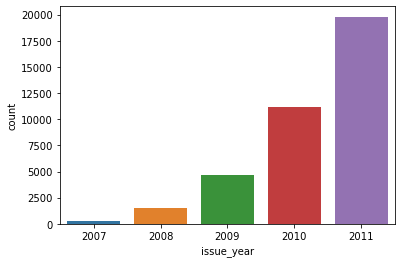

In [79]:
sns.countplot(lc_4.issue_year)

#### Lending Club has a significant growth year on year growth. The highest number of loans were discharged in year 2011. This shows a good profitable growth for Loan Club.




## Bivariate Analysis

### We shall check every influential columns against the loan_status

Text(0.5, 0, 'Loan Status')

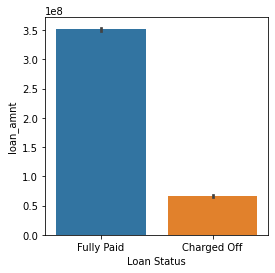

In [80]:
# define a function to plot graph against loan_status for the provided columns

#def bi
#plt.figure(figsize=(5,5))
#sns.barplot (x='loan_status', y='loan_amnt', hue='term', data=lc_4)
#plt.xlabel("Loan Status")

plt.figure(figsize=(4,4))
sns.barplot (x='loan_status', y='loan_amnt',  data=lc_4, estimator=sum)
plt.xlabel("Loan Status")

#sns.()
# barchart only shows the mean

In [81]:
lc_4.groupby('loan_status').loan_amnt.mean()

loan_status
Charged Off    12244.077607
Fully Paid     10930.419972
Name: loan_amnt, dtype: float64

We shall closely analyse various colums to find important indicator with respect to the loan_status.
We shall analyse each factor on total dataset as well as the charged off part of the dataset.

In [82]:
#we add new column loan_status_def in order to quantify loan_status to check correlation
lc_4['loan_status_def']=lc_4['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)


In [83]:
lc_4['loan_status_def'].sum()

5399

In [84]:
# we can create a new dataframe lc_def containing the charged off data
lc_def = lc_4[lc_4.loan_status == "Charged Off"]
lc_def.shape

(5399, 21)

In [85]:
lc_def.dtypes

loan_amnt                      float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies             int32
issue_month                      int64
issue_year                       int64
loan_status_def                  int64
dtype: object

In [86]:
lc_def.corr()

,loan_amnt,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_status_def
loan_amnt,1.000000,0.386206,0.344500,0.924393,0.347746,0.065087,-0.017719,0.069880,0.126399,NaN
term,0.386206,1.000000,0.456311,0.127963,0.076876,0.070010,0.030572,0.065774,0.369144,NaN
int_rate,0.344500,0.456311,1.000000,0.320223,0.126876,0.044896,0.080141,0.080580,0.191972,NaN
installment,0.924393,0.127963,0.320223,1.000000,0.353625,0.041728,-0.018152,0.051837,0.033990,NaN
annual_inc,0.347746,0.076876,0.126876,0.353625,1.000000,-0.089257,0.003207,0.009827,-0.014184,NaN
dti,0.065087,0.070010,0.044896,0.041728,-0.089257,1.000000,0.019663,0.035433,0.097525,NaN
pub_rec_bankruptcies,-0.017719,0.030572,0.080141,-0.018152,0.003207,0.019663,1.000000,-0.037890,0.013410,NaN
issue_month,0.069880,0.065774,0.080580,0.051837,0.009827,0.035433,-0.037890,1.000000,-0.002772,NaN
issue_year,0.126399,0.369144,0.191972,0.033990,-0.014184,0.097525,0.013410,-0.002772,1.000000,NaN
loan_status_def,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

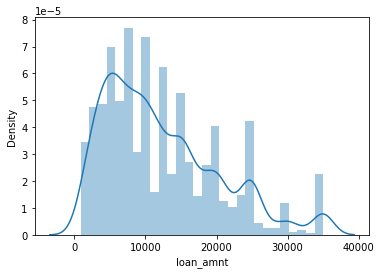

In [87]:
sns.distplot(lc_def.loan_amnt)

In [88]:
#let us bin the loan amounts in brackets of 5000 and analise it
bns=[0,5000,10000,15000,20000,25000,30000,35000]
bns_lbl=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']
lc_4['loan_amnt_bins']=pd.cut(lc_4['loan_amnt'], bins=bns, labels=bns_lbl)
lc_def['loan_amnt_bins']=pd.cut(lc_def['loan_amnt'], bins=bns, labels=bns_lbl)
lc_4.loan_amnt_bins.unique()

['0-5k', '5k-10k', '10k-15k', '20k-25k', '30k-35k', '25k-30k', '15k-20k']
Categories (7, object): ['0-5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k-30k' < '30k-35k']

Text(0.5, 1.0, 'charged off loans')

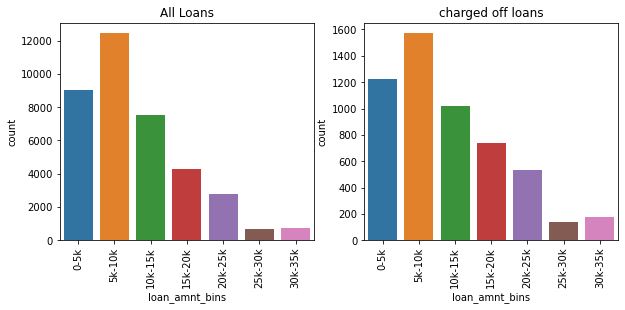

In [134]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
anc=sns.countplot(lc_4.loan_amnt_bins)
anc.set_title('All Loans')
plt.subplot(1,2,2)
#plt.figure(figsize=[5,5])
plt.xticks(rotation=90)
anc=sns.countplot(lc_def.loan_amnt_bins)
anc.set_title('charged off loans')

Most loans are taken for amounts in 5000 to 10000 range.<br>
Trend in charged off loans has to be closely analised along with fully paid loans


Text(0.5, 1.0, 'charged off loans')

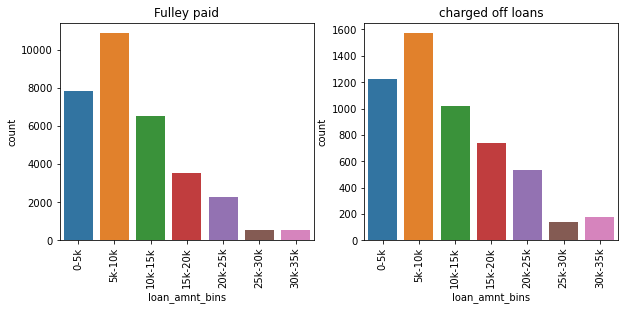

In [89]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
anc=sns.countplot(lc_4[lc_4.loan_status!="Charged Off"].loan_amnt_bins)
anc.set_title('Fulley paid')
plt.subplot(1,2,2)
#plt.figure(figsize=[5,5])
plt.xticks(rotation=90)
anc=sns.countplot(lc_def.loan_amnt_bins)
anc.set_title('charged off loans')

#### Trend in fully paid vs charged off loans look similar for most of the smaller amounts while looks growing for 15k and above buckets of loan amount 


<AxesSubplot:xlabel='loan_amnt_bins'>

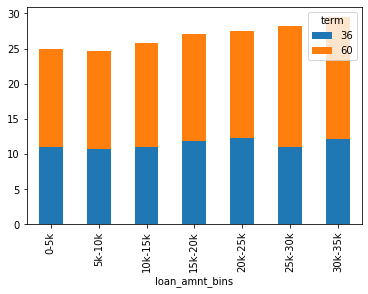

In [91]:
pd.pivot_table(data=lc_4,index='loan_amnt_bins',columns='term',values='int_rate',aggfunc=np.median).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='loan_amnt_bins'>

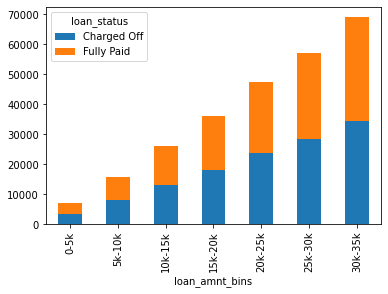

In [92]:
pd.pivot_table(data=lc_4,index='loan_amnt_bins',columns='loan_status',values='loan_amnt').plot(kind='bar', stacked=True)

In [133]:
pd.pivot_table(data=lc_4,index='loan_amnt_bins',columns='loan_status',values='loan_amnt')

loan_status,Charged Off,Fully Paid
loan_amnt_bins,,
0-5k,3510.851761,3523.752075
5k-10k,7966.714377,7885.378746
10k-15k,13074.779628,13013.984997
15k-20k,18014.532520,18179.224357
20k-25k,23714.548023,23799.823555
25k-30k,28510.739437,28760.045455
30k-35k,34542.097701,34549.084249


<AxesSubplot:xlabel='loan_amnt_bins', ylabel='count'>

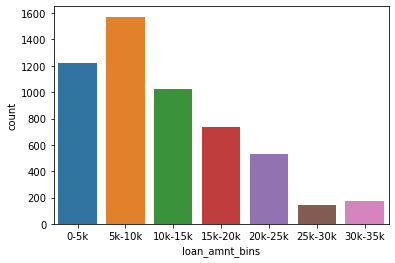

In [93]:
sns.countplot(lc_def.loan_amnt_bins)

<AxesSubplot:>

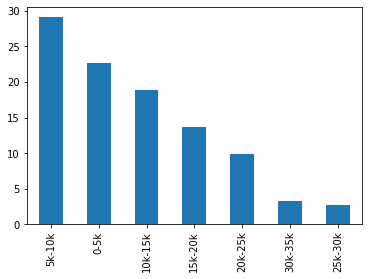

In [94]:
(lc_def.loan_amnt_bins.value_counts(normalize=True)*100).round(2).plot(kind='bar')


5k-10k     1572
0-5k       1221
10k-15k    1021
15k-20k     738
20k-25k     531
30k-35k     174
25k-30k     142
Name: loan_amnt_bins, dtype: int64
5k-10k     12.63
0-5k       13.49
10k-15k    13.52
15k-20k    17.26
20k-25k    18.98
30k-35k    24.17
25k-30k    20.52
Name: loan_amnt_bins, dtype: float64


Text(0.5, 0, 'loam amount in bins of 5000')

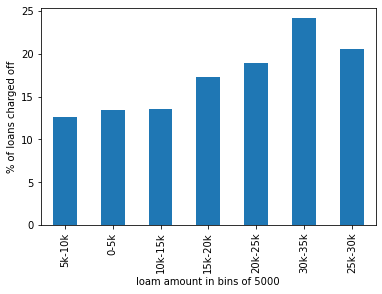

In [95]:
# We shall check the % of Charged off loan based on the loan amount bins
tot_loan_stratum=lc_4.loan_amnt_bins.value_counts()
#print(tot_loan_stratum)
tot_loan_def_stratum=lc_4[lc_4.loan_status=="Charged Off"].loan_amnt_bins.value_counts()
print(tot_loan_def_stratum)
tot_loan_def_stratum_percent=(tot_loan_def_stratum * 100 / tot_loan_stratum).round(2)
print(tot_loan_def_stratum_percent)
#(tot_loan_def_stratum * 100 / tot_loan_stratum).plot.bar()
gr=tot_loan_def_stratum_percent.plot.bar()
gr.set_ylabel('% of loans charged off')
gr.set_xlabel('loam amount in bins of 5000')


<b>
Percentage of charged off loans increases significantly as we go on higher loan amounts. Higher amount loans though less in number but still has a high chance of getting charged off. <br>

Charged off percentage is high for loan amount more than $30K
</b>

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<Figure size 720x720 with 0 Axes>

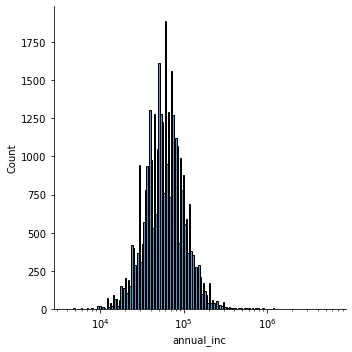

In [257]:
# annual_inc 
print(lc_4.annual_inc.describe())
#plt.figure(figsize=[10,4])
#plt.subplot(1,3,1)
#plt.xticks(rotation=90)
#anc=sns.countplot(lc_4.annual_inc)
#anc.set_title('All Loans')
#plt.subplot(1,3,2)
#plt.figure(figsize=[5,5])
#plt.xticks(rotation=90)
#anc=sns.countplot(lc_def.annual_inc)
#anc.set_title('charged off loans')
plt.figure(figsize=[10,10])
sns.displot(lc_4.annual_inc, log_scale=True, )
#plt.xticks(np.arange(0, 260000, 20000))

plt.show()

In [253]:
# loan_amnt vs annual_inc
lc_4.annual_inc.max()

6000000.0

In [258]:
lc_4.loan_amnt.max()

35000.0

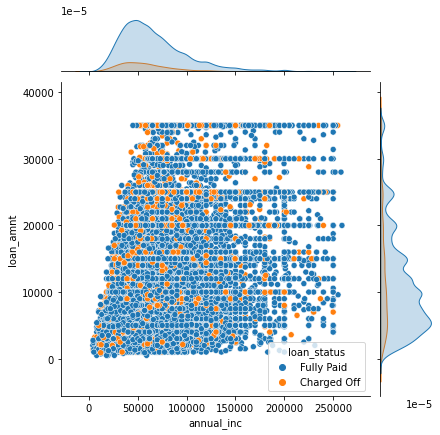

In [268]:
sns.jointplot(y='loan_amnt', x='annual_inc',   data=lc_4[lc_4.annual_inc<260000] , hue='loan_status')

#### observation:
Had few outlayers in Anual income. People were with as high as 6000000$
We see the risk of charged off loans having loan amounts more than their half of their anual income


In [ ]:
bns=[0,25000,50000,30000,40000,50000,30000,35000]  #cut at these values
bns_lbl=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']  # label them

In [96]:
lc_4.corr()

,loan_amnt,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_status_def
loan_amnt,1.000000,0.345564,0.299237,0.931686,0.266282,0.061402,-0.030901,0.052812,0.115074,0.062680
term,0.345564,1.000000,0.440717,0.087956,0.043201,0.078386,0.019654,0.034794,0.242682,0.175200
int_rate,0.299237,0.440717,1.000000,0.274791,0.046092,0.112188,0.084008,0.026176,0.044083,0.213497
installment,0.931686,0.087956,0.274791,1.000000,0.264684,0.050727,-0.029021,0.029796,0.057550,0.029868
annual_inc,0.266282,0.043201,0.046092,0.264684,1.000000,-0.123582,-0.012143,0.009557,0.012689,-0.038501
dti,0.061402,0.078386,0.112188,0.050727,-0.123582,1.000000,0.008090,0.012125,0.094332,0.042803
pub_rec_bankruptcies,-0.030901,0.019654,0.084008,-0.029021,-0.012143,0.008090,1.000000,-0.019147,0.008922,0.044835
issue_month,0.052812,0.034794,0.026176,0.029796,0.009557,0.012125,-0.019147,1.000000,-0.035307,0.025811
issue_year,0.115074,0.242682,0.044083,0.057550,0.012689,0.094332,0.008922,-0.035307,1.000000,0.022816
loan_status_def,0.062680,0.175200,0.213497,0.029868,-0.038501,0.042803,0.044835,0.025811,0.022816,1.000000


In [97]:
#Some of the important variable to analyse based on the defeinition
imp_variables=['loan_amnt','term','int_rate','grade','sub_grade',
'annual_inc','purpose','dti','emp_length','home_ownership','verification_status']

#sns.pairplot(lc_4[imp_variables])
lc_4.verification_status.unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

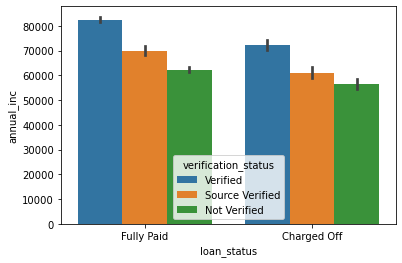

In [127]:
# Milti variate, loan_status against anual_income and verification_status
lc_4.groupby(['loan_status']).annual_inc.describe()
sns.barplot(x='loan_status' ,y='annual_inc',hue='verification_status',data=lc_4  )

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

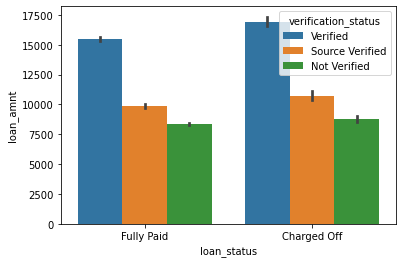

In [288]:
#### The verification status seems to be almost same for 
sns.barplot(x='loan_status' ,y='loan_amnt',hue='verification_status',data=lc_4  )

In [142]:
lc_4.groupby(['loan_status','verification_status']).annual_inc.quantile(0.5)

loan_status  verification_status
Charged Off  Not Verified           48100.0
             Source Verified        50000.0
             Verified               62000.0
Fully Paid   Not Verified           54000.0
             Source Verified        56500.0
             Verified               72000.0
Name: annual_inc, dtype: float64

In [143]:
lc_4.groupby(['loan_status','verification_status']).dti.quantile(0.5)

loan_status  verification_status
Charged Off  Not Verified           14.370
             Source Verified        13.110
             Verified               15.325
Fully Paid   Not Verified           12.940
             Source Verified        12.580
             Verified               14.230
Name: dti, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

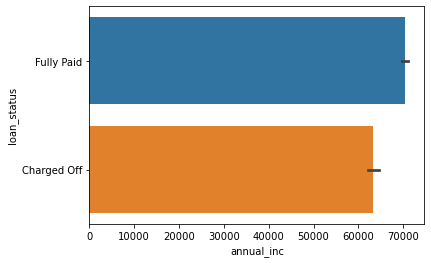

In [287]:
sns.barplot(x='annual_inc', y='loan_status' , data=lc_4)

In [99]:
print('ons')

ons


loan_status  term
Charged Off  36       3073
             60       2326
Fully Paid   36      25214
             60       6931
dtype: int64
loan_status
Charged Off     5399
Fully Paid     32145
dtype: int64
ratio of charge off vs fully paid 60months = 0.3355937094214399  36 months =  0.12187673514714048


Text(0, 0.5, 'Ratio of charge off vs fully paid Loans')

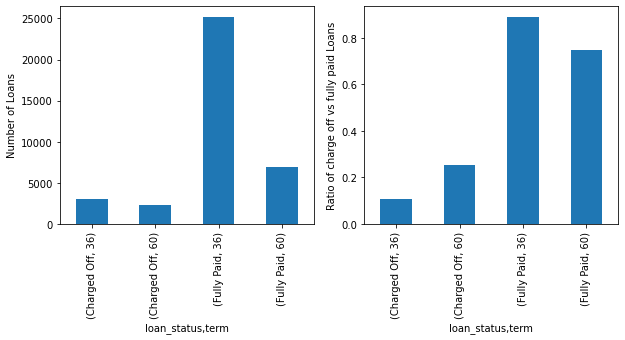

In [190]:
# Term distributed 
print(lc_4.groupby(['loan_status','term']).size() )
print(lc_4.groupby('loan_status').size())
print("ratio of charge off vs fully paid 60months =", (2326/6931), " 36 months = ",(3073/25214))

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
ax = lc_4.groupby(['loan_status','term']).size().plot.bar()
ax.set_ylabel("Number of Loans")
plt.subplot(1, 2, 2)
ax = (lc_4.groupby(['loan_status','term']).size()/lc_4.groupby('term').size() ).plot.bar()
ax.set_ylabel("Ratio of charge off vs fully paid Loans")


<b>
One out of four loans with tenure 60 months end up in charge off.<br>
Loans of shorter term 36 months were seen more prominantly paid back. So we recomend promoting it.<br>
Recomadation would be to carefully analyse the loans for greater tenure, and reduce approvals for 60 months loans.
</b>

In [100]:
lc_4.groupby(['loan_status','term']).loan_amnt.sum()

loan_status  term
Charged Off  36       29277200.0
             60       36828575.0
Fully Paid   36      244132700.0
             60      107225650.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_status,term'>

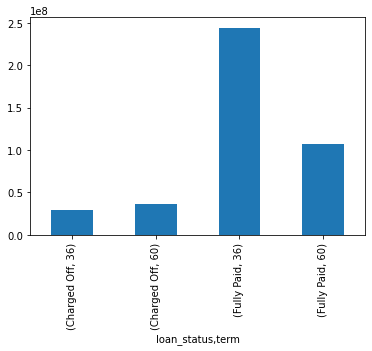

In [101]:
lc_4.groupby(['loan_status','term']).loan_amnt.sum().plot.bar()

In [137]:
lc_4.groupby(['loan_status','term']).loan_amnt.count()

loan_status  term
Charged Off  36       3073
             60       2326
Fully Paid   36      25214
             60       6931
Name: loan_amnt, dtype: int64

Text(0, 0.5, 'Number of loans')

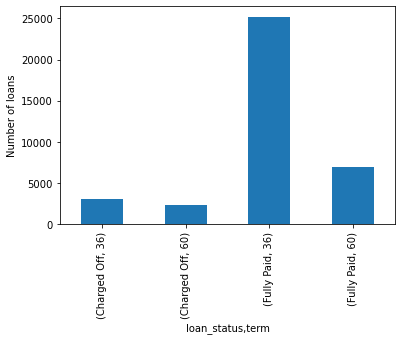

In [138]:
lc_4.groupby(['loan_status','term']).loan_amnt.count().plot.bar().set_ylabel('Number of loans')

#### We see an higher chance of charged off loans for 60 months term.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

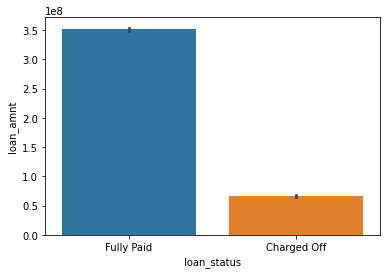

In [104]:
sns.barplot(data=lc_4, x='loan_status', y='loan_amnt') # this gets mean/average
sns.barplot(data=lc_4, x='loan_status', y='loan_amnt', estimator=np.median)
sns.barplot(data=lc_4, x='loan_status', y='loan_amnt', estimator=lambda x: x.sum())

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

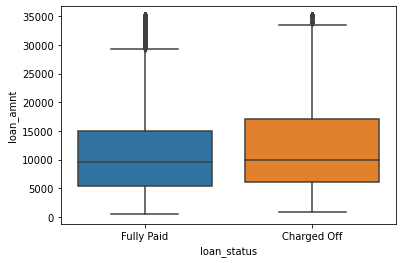

In [105]:
sns.boxplot(lc_4['loan_status'],lc_4['loan_amnt'] ) # it compares the Q1,medianand Q3 


#### Loan amount of “Charged off” loans are  little higher than that of “fully paid” loans on an average.  


In [197]:
rat=pd.pivot_table(data=lc_4,index='grade',columns='term',values='int_rate',aggfunc=lambda x:np.quantile(x, 0.5) )

<AxesSubplot:xlabel='term', ylabel='grade'>

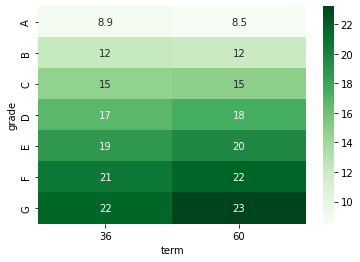

In [195]:
sns.heatmap(rat, cmap="Greens", annot=True)

#### Interest rates are high for 60 month loans. Charge off percentage is high for high interest rate loans.
#### Higher grades end up with higher percent of interest rate.


<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_amnt_bins'>

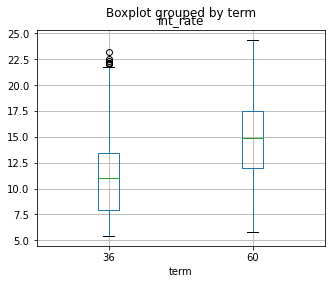

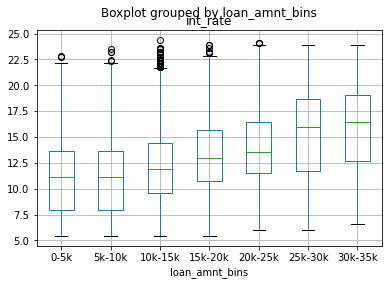

In [225]:
# int_rate 
# compare rate of interest with loan amount, 
#plt.figure(figsize=(4,3))

#plt.subplot(1, 2, 1)
#lc_4.boxplot(column='int_rate')
#groupby('loan_amnt_bins')
#lc_4.groupby('term').int_rate.mean().plot(kind='bar')
#

lc_4.boxplot(column='int_rate', by='term', figsize=(5,4))

#plt.subplot(1, 2, 1)
print("============================================")

lc_4.boxplot(column='int_rate', by='loan_amnt_bins')


#sns.boxplot(lc_4['int_rate'],lc_4['loan_amnt_bins'] )
#sns.scatterplot(data=lc_4, x='int_rate', y='loan_amnt')
#sns.boxplot(lc_4['int_rate'],lc_4['loan_amnt'] )
#plt.subplot(1, 2, 2)
#sns.boxplot(x=df[col], y=df['loan_status'], data=df)
#lc_4.boxplot(lc_4['int_rate'],lc_4['sub_grade'] )
#plt.show()

#### Boxplot also strengtens the fact that interest rate increases for increase in loan amount.

Text(0, 0.5, 'Interest rate')

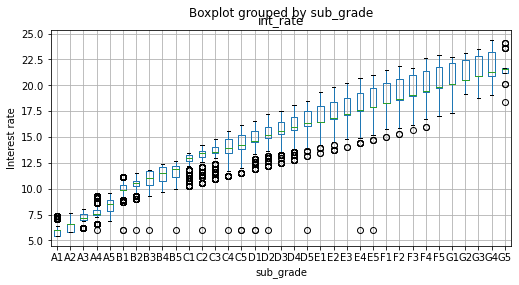

In [251]:
lc_4.boxplot(column='int_rate', by='sub_grade', figsize=(8,4)).set_ylabel("Interest rate")

#### Higher grade/subgrade indicate higher interest rate for the loan.

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

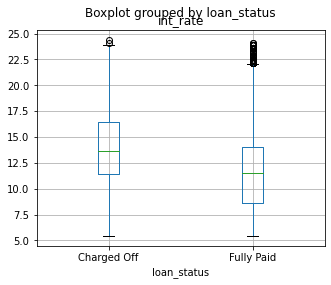

In [222]:
#interest rate vs loan_status
lc_4.boxplot(column='int_rate', by='loan_status', figsize=(5,4))


#### Charged off loans also show a higher interest rate. So we can correlate that when interest rate increases, the chances of loan getting charged off increases as well.


In [110]:
lc_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37544 non-null  float64       
 1   term                  37544 non-null  int64         
 2   int_rate              37544 non-null  float64       
 3   installment           37544 non-null  float64       
 4   grade                 37544 non-null  object        
 5   sub_grade             37544 non-null  object        
 6   emp_title             37544 non-null  object        
 7   emp_length            37544 non-null  object        
 8   home_ownership        37544 non-null  object        
 9   annual_inc            37544 non-null  float64       
 10  verification_status   37544 non-null  object        
 11  issue_d               37544 non-null  datetime64[ns]
 12  loan_status           37544 non-null  object        
 13  purpose         

In [111]:
round(lc_5.groupby(['purpose']).loan_amnt.describe()/len(lc_5)*100, 2)

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,3.93,18.44,11.03,2.72,10.87,16.31,23.11,76.12
credit_card,13.12,31.14,18.30,1.97,16.86,27.19,40.78,95.15
debt_consolidation,46.83,33.51,19.49,1.90,19.03,29.90,43.50,95.15
educational,0.86,18.63,14.08,2.45,8.16,14.54,27.19,67.96
home_improvement,7.44,30.48,21.48,2.45,13.59,26.10,40.78,95.15
house,0.93,34.10,21.44,3.26,16.31,27.19,41.73,95.15
major_purchase,5.63,21.86,16.30,2.72,10.87,16.31,27.19,95.15
medical,1.76,21.80,16.01,2.72,10.87,16.31,27.19,95.15
moving,1.48,17.74,15.24,2.72,8.16,13.59,21.75,95.15


In [112]:
lc_4.corr()['loan_amnt'][:-1]

loan_amnt               1.000000
term                    0.345564
int_rate                0.299237
installment             0.931686
annual_inc              0.266282
dti                     0.061402
pub_rec_bankruptcies   -0.030901
issue_month             0.052812
issue_year              0.115074
Name: loan_amnt, dtype: float64

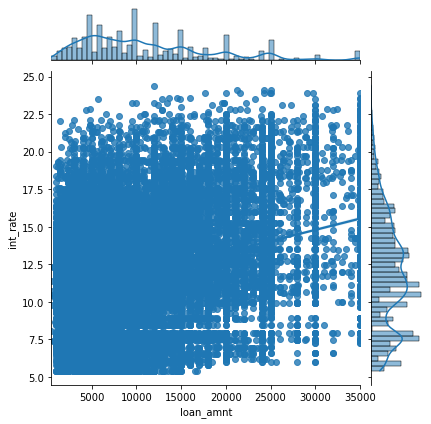

In [277]:
sns.jointplot(lc_4.loan_amnt, lc_4.int_rate, kind="reg")



#### Higher Interest rates are set for higher loan amounts. We see a direct raise in it. The regression line also shows an increasing trend.



Text(0.5, 0.98, 'Interest rate Vs Loan amount Vs Loan status')

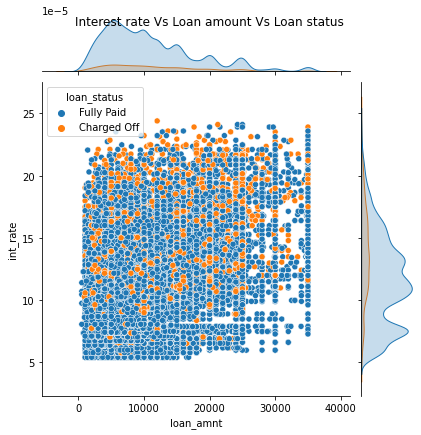

In [276]:
ax=sns.jointplot(lc_4.loan_amnt, lc_4.int_rate,data=lc_4, hue='loan_status')
ax.fig.suptitle("Interest rate Vs Loan amount Vs Loan status")

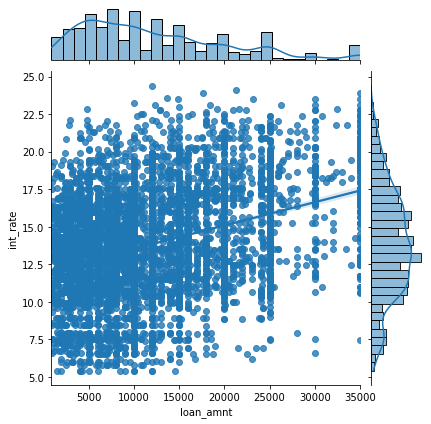

In [114]:
sns.jointplot(lc_def.loan_amnt, lc_def.int_rate, kind="reg")

<AxesSubplot:xlabel='loan_status', ylabel='count'>

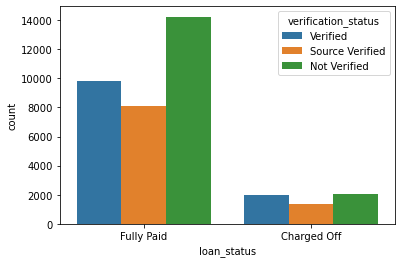

In [294]:
sns.countplot(x='loan_status', hue='verification_status', data=lc_4  )

#### Charged off loans has more verified statuses in average

Non verified status does not show any significant inference for charged off loans.


Text(0, 0.5, 'Dti')

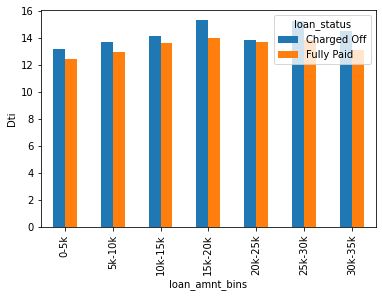

In [290]:
pd.pivot_table(data=lc_4, index='loan_amnt_bins',  columns='loan_status',   values='dti'  ).plot.bar().set_ylabel("Dti")

loan_status  verification_status
Charged Off  Not Verified            2049
             Source Verified         1396
             Verified                1954
Fully Paid   Not Verified           14229
             Source Verified         8098
             Verified                9818
Name: annual_inc, dtype: int64


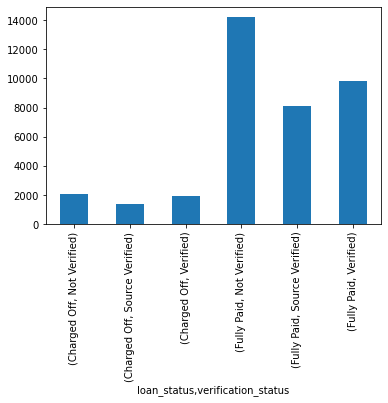

In [291]:
lc_4.groupby(['loan_status','verification_status']).annual_inc.count().plot(kind='bar')
print(lc_4.groupby(['loan_status','verification_status']).annual_inc.count())

#### Non verified status does not show any significant inference for charged off loans.


In [228]:
# having a function to do distplot as well as box at same time
def dist_bar_box(df, col):
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)
    plt.show()

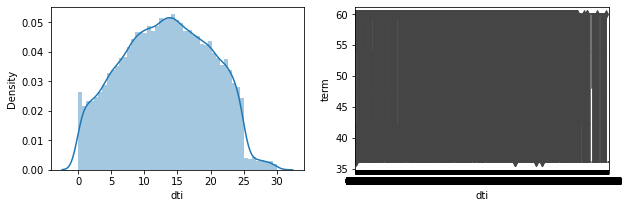

In [236]:
#dist_bar_box(lc_4, 'loan_amnt')dti
#lc_4.groupby('term').dti.mean().plot.box()
#lc_4.groupby('loan_status').dti.plot.box()
dist_bar_box(lc_4, 'dti')


Text(0.5, 1.0, 'dti for all loans')

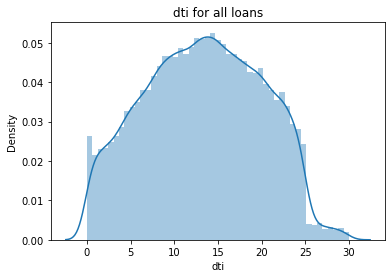

In [423]:
sns.distplot(lc_4.dti).set_title("dti for all loans")

Text(0.5, 1.0, 'dti for charged off')

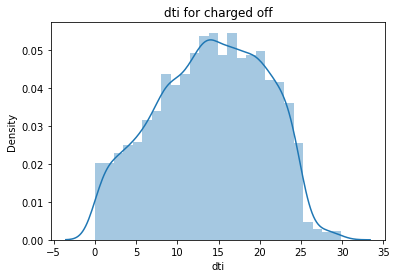

In [422]:
#sns.countplot(data=lc_4, x='dti') # , hue='loan_amnt'
#sns.countplot(x='loan_status', data=lc_4 , hue='dti')
#lc_4.plot.scatter(y="dti",x='loan_status')
#.plot.box()
sns.distplot(lc_4[lc_4.loan_status=='Charged Off'].dti  ).set_title("dti for charged off")

0    27.65
2     8.72
3    20.00
5    11.20
6    23.51
Name: dti, dtype: float64

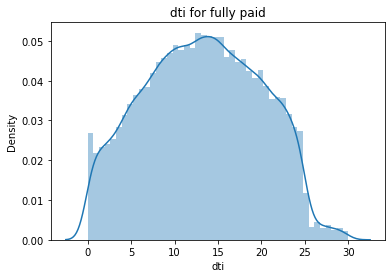

In [425]:
sns.distplot(lc_4[lc_4.loan_status!='Charged Off'].dti  ).set_title("dti for fully paid")
lc_4[lc_4.loan_status!='Charged Off'].dti.head()

#### Debit to income seems to similarly distributed for both fully paid as well as charged off loans after 15.
#### Dti less than 15 has more full paid loans

Text(0.5, 1.0, 'Home ownership of Charged off loans in detail')

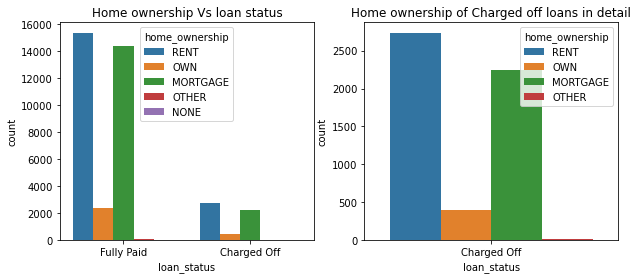

In [305]:
#dti vs loan_status 
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.countplot(x='loan_status', data=lc_4 , hue='home_ownership').set_title("Home ownership Vs loan status")
plt.subplot(1, 2, 2)
sns.countplot(x='loan_status', data=lc_def , hue='home_ownership').set_title("Home ownership of Charged off loans in detail")

#### People in Rented house and Mortgate seems to have more chances of charged off than that of people in own house.


Text(0.5, 1.0, 'Employment Length Vs loan status')

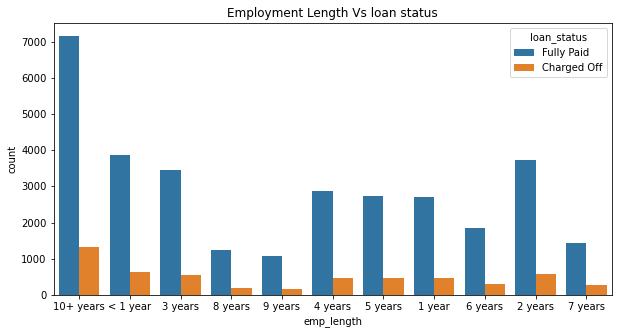

In [312]:
#dti vs loan_status 
plt.figure(figsize=(10,5))

sns.countplot(x='emp_length', data=lc_4 , hue='loan_status').set_title("Employment Length Vs loan status")


#### People with employment length 10+ years tend to take more loans. 
Assuming the population would be more in 10+ years as it might contain, employees with 10 to 40/50 years of employment



emp_length
1 year       14.389397
10+ years    15.680961
2 years      13.213703
3 years      13.833500
4 years      13.824057
5 years      14.339386
6 years      14.160517
7 years      15.371128
8 years      14.146341
9 years      12.887439
< 1 year     14.174800
Name: loan_status, dtype: float64


Text(0.5, 1.0, '% purpose of charged off loans')

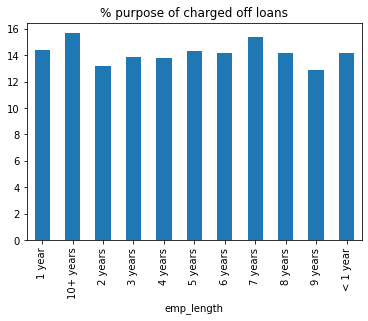

In [356]:
ve1=lc_4[lc_4.loan_status=="Charged Off"].groupby('emp_length').loan_status.count() 
ve2=lc_4.groupby('emp_length').loan_status.count()
print(ve1*100/ve2)
#/lc_4.groupby('emp_length').loan_status.count()

ax=(ve1*100/ve2).plot.bar()
ax.set_title('% purpose of charged off loans')

#### % of charged off loans also shows slightly higher for 10+ years followed by 7 years 


<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

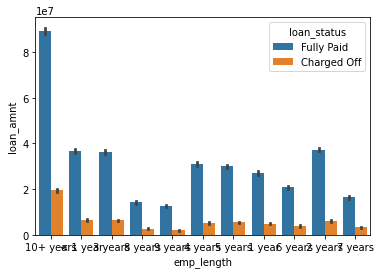

In [327]:
sns.barplot(x='emp_length', y='loan_amnt', data=lc_4 , hue='loan_status', estimator=sum)

In [380]:
def perc_plot(df,col,titl):
    vp1=df[df.loan_status=="Charged Off"].groupby(col).loan_status.count() 
    
    vp2=lc_4.groupby(col).loan_status.count()
    print(vp1,vp2)
    print(vp1*100/vp2)
    #/lc_4.groupby('emp_length').loan_status.count()
    plt.figure(figsize=(12,5))
    ax=(vp1*100/vp2).plot.bar()
    ax.set_title(titl)


Text(0.5, 1.0, 'State Vs loan status')

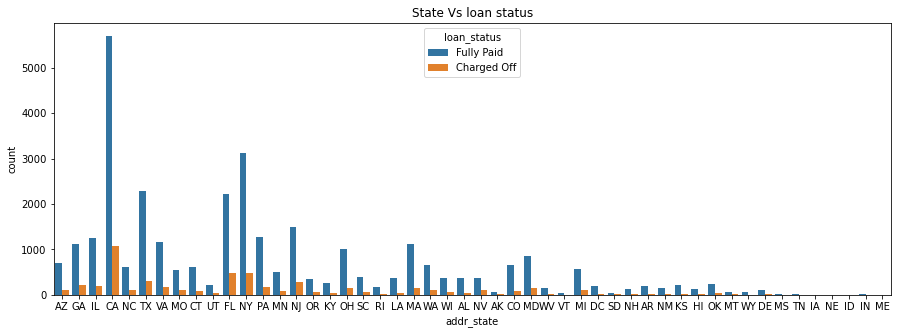

In [379]:
# zip_code, addr_state
lc_4.addr_state.unique()
plt.figure(figsize=(15,5))

sns.countplot(x='addr_state', data=lc_4 , hue='loan_status').set_title("State Vs loan status")



addr_state
AK      15
AL      51
AR      26
AZ     114
CA    1074
CO      91
CT      89
DC      15
DE      12
FL     482
GA     209
HI      28
ID       1
IL     194
KS      26
KY      45
LA      52
MA     150
MD     158
MI      97
MN      79
MO     106
MS       2
MT      10
NC     110
NE       3
NH      23
NJ     276
NM      29
NV     101
NY     476
OH     146
OK      40
OR      69
PA     170
RI      25
SC      64
SD      11
TN       2
TX     309
UT      39
VA     173
VT       6
WA     118
WI      59
WV      21
WY       3
Name: loan_status, dtype: int64 addr_state
AK      76
AL     418
AR     227
AZ     806
CA    6768
CO     744
CT     707
DC     211
DE     110
FL    2694
GA    1319
HI     162
IA       5
ID       6
IL    1442
IN       9
KS     244
KY     307
LA     417
MA    1268
MD    1005
ME       3
MI     671
MN     583
MO     647
MS      19
MT      77
NC     726
NE       5
NH     157
NJ    1768
NM     179
NV     464
NY    3599
OH    1146
OK     282
OR     421
PA    1437
RI     192


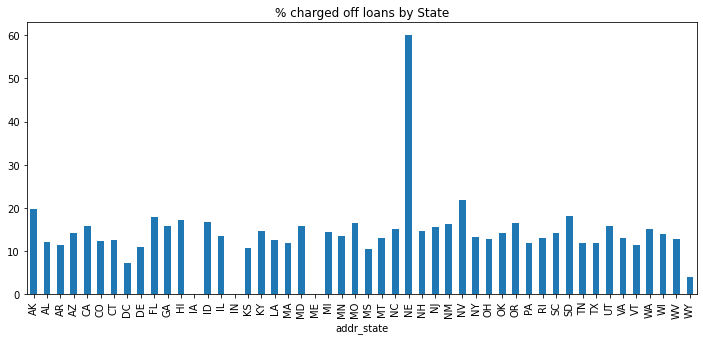

In [381]:
perc_plot(lc_4,'addr_state','% charged off loans by State')

State CA has the highest number of loans.<br>
IA, IN and ME are those with 100% loan repayment rate. They are more profitable customers<br>
NE though having less number of loans, shows a high rate of charging off. Lending Club must double ckeck before approving loans from this state

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

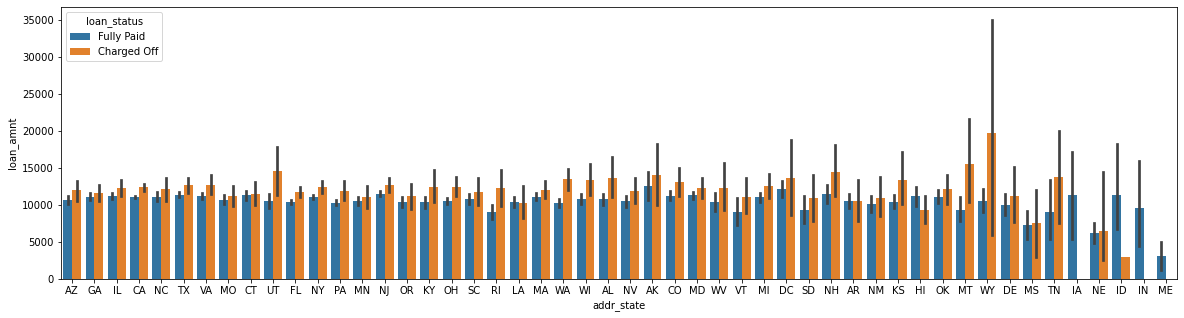

In [384]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status', data=lc_4)

In [386]:
lc_4[(lc_4.addr_state=='WY')&(lc_4.loan_status=='Charged Off')]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year,loan_status_def,loan_amnt_bins
5904,18000.0,60,17.58,452.98,D,D4,Sweetwater School District #1,6 years,OWN,65000.0,...,Charged Off,debt_consolidation,829xx,WY,22.73,0,10,2011,1,15k-20k
14315,35000.0,60,15.23,836.88,C,C5,"CPS Distributors,Inc",10+ years,MORTGAGE,65000.0,...,Charged Off,credit_card,826xx,WY,25.13,0,5,2011,1,30k-35k
26142,6000.0,36,16.45,212.28,E,E1,Casper Star Tribune,10+ years,MORTGAGE,70000.0,...,Charged Off,small_business,826xx,WY,6.48,0,9,2010,1,5k-10k
